In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [51]:
df=pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [52]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [54]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [55]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [56]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [57]:
df.shape

(150, 5)

In [58]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [59]:
col=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.boxplot(col)

<Axes: >

In [60]:
q1=df["sepal_width"].quantile(0.25)
q3=df["sepal_width"].quantile(0.75)
iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print("IQR:",iqr)
print("lower bound: ",lower_bound)
print("upper_bound: ",upper_bound)
sepal=df["sepal_width"]
outliers=[]
for i in sepal:
    if(i>upper_bound or i<lower_bound):
        outliers.append(i)
    
print("outliers are: ")
print(outliers)
outlier=df[(df["sepal_width"]>upper_bound) | (df["sepal_width"]<lower_bound)]
print("outliers row in sepal width")
print(outlier)

IQR: 0.5
lower bound:  2.05
upper_bound:  4.05
outliers are: 
[4.4, 4.1, 4.2, 2.0]
outliers row in sepal width
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor


In [61]:
df_cleaned=df[(df["sepal_width"]>=lower_bound) & (df["sepal_width"]<=upper_bound)]

In [62]:
print("original shape:",df.shape)
print("shape after removing outliers: ",df_cleaned.shape)

original shape: (150, 5)
shape after removing outliers:  (146, 5)


In [63]:

X_cleaned = df_cleaned[col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

print(X_scaled[:5])

[[-0.9105154   1.1757891  -1.3748782  -1.34589856]
 [-1.15112218 -0.09392398 -1.3748782  -1.34589856]
 [-1.39172896  0.41396125 -1.43198551 -1.34589856]
 [-1.51203236  0.16001863 -1.31777088 -1.34589856]
 [-1.03081879  1.42973171 -1.3748782  -1.34589856]]


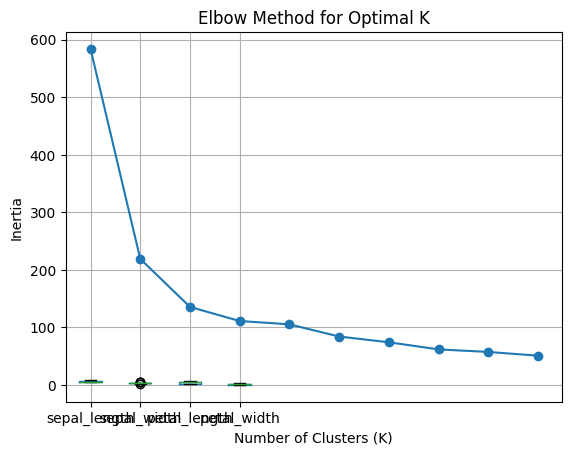

In [64]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [65]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

df_cleaned['Cluster'] = clusters

print(df_cleaned.head())

   sepal_length  sepal_width  petal_length  petal_width species  Cluster
0           5.1          3.5           1.4          0.2  setosa        2
1           4.9          3.0           1.4          0.2  setosa        2
2           4.7          3.2           1.3          0.2  setosa        2
3           4.6          3.1           1.5          0.2  setosa        2
4           5.0          3.6           1.4          0.2  setosa        2


C:\Users\Mahesh Gaikwad\AppData\Local\Temp\ipykernel_5988\2014923922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = clusters


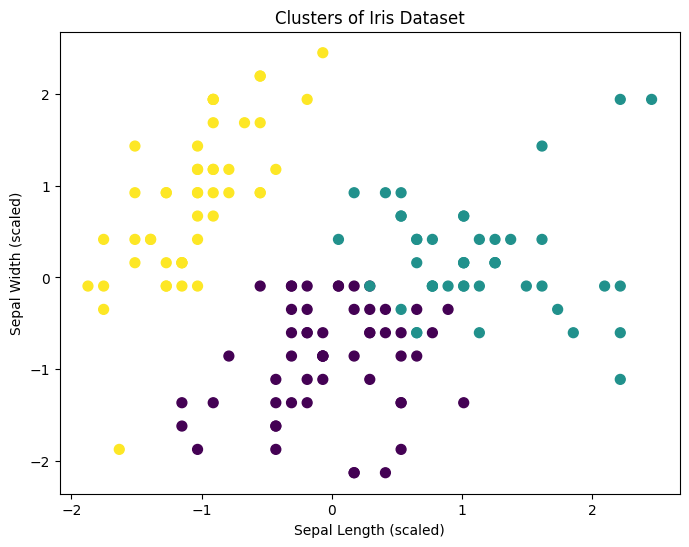

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Clusters of Iris Dataset')
plt.show()